In [1]:
import pandas as pd

summary = pd.read_csv("data/worldometer_coronavirus_summary_data.csv")
summary.head()


,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277


In [5]:
summary[["country", "total_confirmed"]].sort_values(
    by="total_confirmed", ascending=False
).head()


,country,total_confirmed
216,USA,84209473
94,India,43121599
26,Brazil,30682094
72,France,29160802
78,Germany,25780226


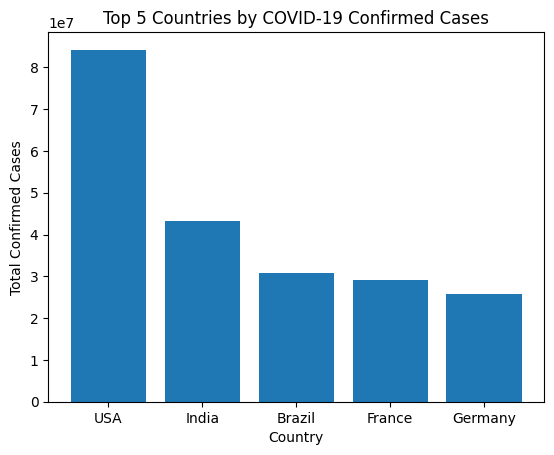

In [6]:
import matplotlib.pyplot as plt

top5 = summary.sort_values("total_confirmed", ascending=False).head(5)

plt.bar(top5["country"], top5["total_confirmed"])
plt.title("Top 5 Countries by COVID-19 Confirmed Cases")
plt.xlabel("Country")
plt.ylabel("Total Confirmed Cases")
plt.show()


In [10]:
summary.to_csv("cleaned_covid_summary.csv", index=False)


In [11]:
summary[["country", "total_deaths"]].sort_values(
    by="total_deaths", ascending=False
).head()


,country,total_deaths
216,USA,1026646.0
26,Brazil,664920.0
94,India,524214.0
165,Russia,377670.0
131,Mexico,324465.0


In [12]:
summary[["country", "active_cases"]].sort_values(
    by="active_cases", ascending=False
).head()


,country,active_cases
216,USA,1938567.0
78,Germany,1685607.0
220,Viet Nam,1298525.0
101,Italy,998118.0
72,France,856871.0


In [13]:
summary["recovery_rate"] = (
    summary["total_recovered"] / summary["total_confirmed"]
) * 100

summary[["country", "recovery_rate"]].sort_values(
    by="recovery_rate", ascending=False
).head()


,country,recovery_rate
90,Holy See,100.000000
43,China Macao Sar,100.000000
150,Niue,100.000000
168,Saint Helena,100.000000
22,Bhutan,99.867383


In [14]:
continent_cases = summary.groupby("continent")["total_confirmed"].sum()
continent_cases


continent
Africa                12042400
Asia                 149999659
Australia/Oceania      7942867
Europe               194330079
North America         99625662
South America         57136485
Name: total_confirmed, dtype: int64

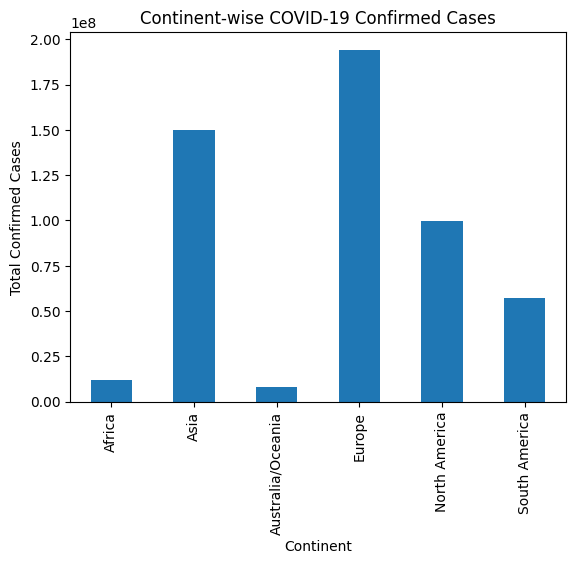

In [15]:
continent_cases.plot(kind="bar")
plt.title("Continent-wise COVID-19 Confirmed Cases")
plt.xlabel("Continent")
plt.ylabel("Total Confirmed Cases")
plt.show()


In [16]:
summary[["country", "total_cases_per_1m_population"]].sort_values(
    by="total_cases_per_1m_population", ascending=False
).head()


,country,total_cases_per_1m_population
68,Faeroe Islands,704302
3,Andorra,543983
93,Iceland,540134
80,Gibraltar,538400
57,Denmark,510561


In [17]:
summary[["total_confirmed", "total_deaths", "total_tests"]].corr()


,total_confirmed,total_deaths,total_tests
total_confirmed,1.000000,0.905518,0.878797
total_deaths,0.905518,1.000000,0.775164
total_tests,0.878797,0.775164,1.000000


In [18]:
summary["death_rate"] = (
    summary["total_deaths"] / summary["total_confirmed"]
) * 100

summary[["country", "death_rate"]].sort_values(
    by="death_rate", ascending=False
).head()


,country,death_rate
223,Yemen,18.182587
222,Western Sahara,10.000000
194,Sudan,7.940670
158,Peru,5.963825
131,Mexico,5.647140


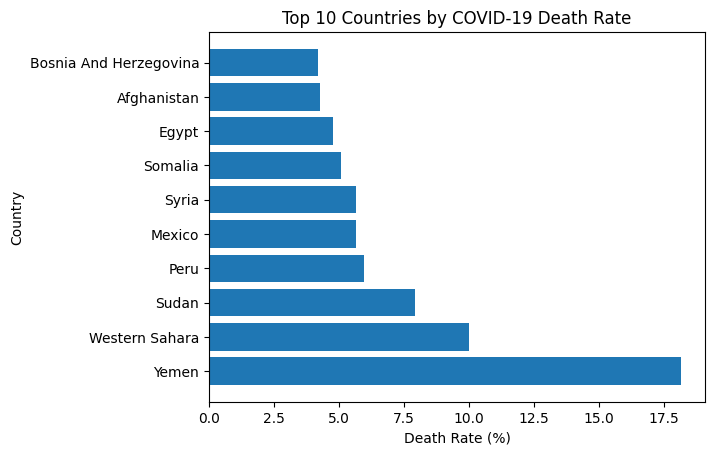

In [19]:
top10_death = summary.sort_values("death_rate", ascending=False).head(10)

plt.barh(top10_death["country"], top10_death["death_rate"])
plt.title("Top 10 Countries by COVID-19 Death Rate")
plt.xlabel("Death Rate (%)")
plt.ylabel("Country")
plt.show()
